In [3]:
#For the heart disease dataset (heart.csv), 
#use the categorical variable to learn a decision tree to classify the records. 
#You model should be learnt against a 70-30 testing training split. 
#All the performance evaluation matrices should be reported

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [128]:
df=pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [129]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [130]:
#Checking the Description
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [131]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [132]:
df.shape #observation 918 rows and 12 columns

(918, 12)

In [133]:
#Data Analysis
#Feature Engineering
#Feature Selection
#Model Building
#Model Deployment

#step1 Data Analysics:
#In Data analysics steps we will do the follwing things
#Misssing Values
#All The Numerical Variables
#Distribution of the Numerical Variables
#Categorical Variables
#Cardinality of Categorical Variables
#Outliers
#Relationship between independent and dependent feature(Lung_Cancer)

#Checking Missing Values(NaN)
df.isnull().sum()
#Observation no missing values


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [134]:
for i in df:
    print("DataFrame Column{},value{}".format(df[i],df[i].unique()))

DataFrame Column0      40
1      49
2      37
3      48
4      54
       ..
913    45
914    68
915    57
916    57
917    38
Name: Age, Length: 918, dtype: int64,value[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
DataFrame Column0      M
1      F
2      M
3      F
4      M
      ..
913    M
914    M
915    M
916    F
917    M
Name: Sex, Length: 918, dtype: object,value['M' 'F']
DataFrame Column0      ATA
1      NAP
2      ATA
3      ASY
4      NAP
      ... 
913     TA
914    ASY
915    ASY
916    ATA
917    NAP
Name: ChestPainType, Length: 918, dtype: object,value['ATA' 'NAP' 'ASY' 'TA']
DataFrame Column0      140
1      160
2      130
3      138
4      150
      ... 
913    110
914    144
915    130
916    130
917    138
Name: RestingBP, Length: 918, dtype: int64,value[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 

In [135]:
#Finding the Numerical Variable
#Numerical Variables:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']


In [136]:
numerical_features

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [137]:
#Finding the Categorical Variable
#Categorical Variables:
Categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
Categorical_features

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [138]:
#Converting the Categorical Variable into Numerical VAriable:
#converting the sex and ExerciseAngina into Numerical Variable :
#converting the categorical variable:
data1=df.replace({'N':0,'Y':1,'M':0,'F':1})

In [139]:
data1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [140]:
data1.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,0,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,0,0.0,Flat,1
917,38,0,NAP,138,175,0,Normal,173,0,0.0,Up,0


In [141]:
data1['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [142]:
# converting features to categorical features ST_Slope,RestingECG
data1['ST_Slope'][data1['ST_Slope'] == 'Up'] = 1
data1['ST_Slope'][data1['ST_Slope'] == 'Flat'] = 2
data1['ST_Slope'][data1['ST_Slope'] == 'Down'] = 3


data1['RestingECG'][data1['RestingECG']=='Normal']=0
data1['RestingECG'][data1['RestingECG']=='ST']=1
data1['RestingECG'][data1['RestingECG']=='LVH']=2



data1['ChestPainType'][data1['ChestPainType'] == 'TA'] = 1
data1['ChestPainType'][data1['ChestPainType'] == 'ATA'] =2
data1['ChestPainType'][data1['ChestPainType'] == 'NAP'] =3
data1['ChestPainType'][data1['ChestPainType'] == 'ASY'] = 4

C:\Users\muham\AppData\Local\Temp\ipykernel_8924\2865517258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['ST_Slope'][data1['ST_Slope'] == 'Up'] = 1
C:\Users\muham\AppData\Local\Temp\ipykernel_8924\2865517258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['ST_Slope'][data1['ST_Slope'] == 'Flat'] = 2
C:\Users\muham\AppData\Local\Temp\ipykernel_8924\2865517258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

In [143]:
data1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,3,160,180,0,0,156,0,1.0,2,1
2,37,0,2,130,283,0,1,98,0,0.0,1,0
3,48,1,4,138,214,0,0,108,1,1.5,2,1
4,54,0,3,150,195,0,0,122,0,0.0,1,0


In [144]:
data1.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,0,1,110,264,0,0,132,0,1.2,2,1
914,68,0,4,144,193,1,0,141,0,3.4,2,1
915,57,0,4,130,131,0,0,115,1,1.2,2,1
916,57,1,2,130,236,0,2,174,0,0.0,2,1
917,38,0,3,138,175,0,0,173,0,0.0,1,0


In [145]:
#EDA:
#Create a function to plot categorical Data:
def cat_feature_plot(f_name):

    feature_value=df[f_name].value_counts().values
    feature_index=df[f_name].value_counts().index

    plt.figure(figsize=(15,5))
    plt.style.use('seaborn-dark-palette')
    plt.suptitle('*'*10+'distribution of categorical feature : {}'.format(f_name)+'*'*10 , fontweight='heavy')
##### pie chart ####
    plt.subplot(1,2,1)
    plt.pie(feature_value , labels=feature_index,autopct='%1.1f%%')
    plt.title('pie chart')


###### bar plot  ####
    plt.subplot(1,2,2)
    plt.bar(x=feature_index,height=feature_value,color=['blue','green','red','pink','yellow'])
    plt.xticks(feature_index)
    plt.title('bar chart')

[None, None, None, None, None]

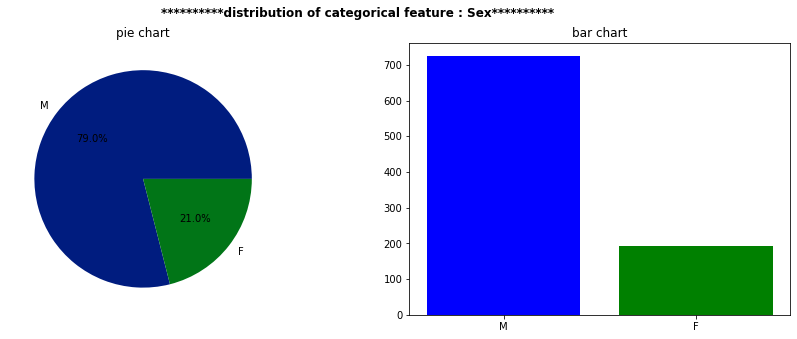

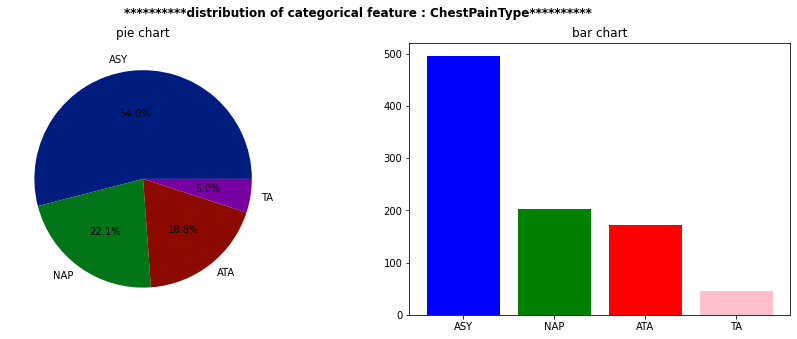

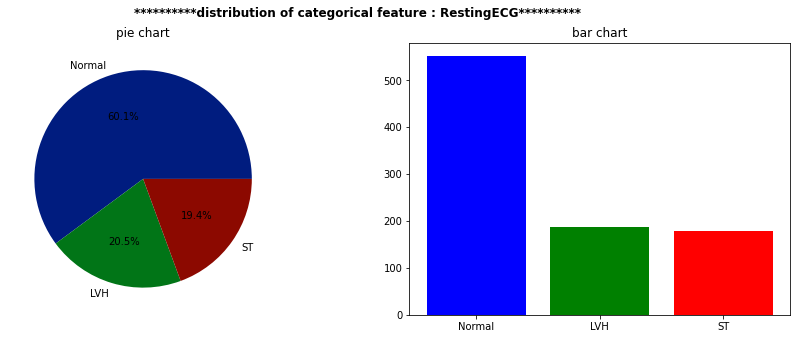

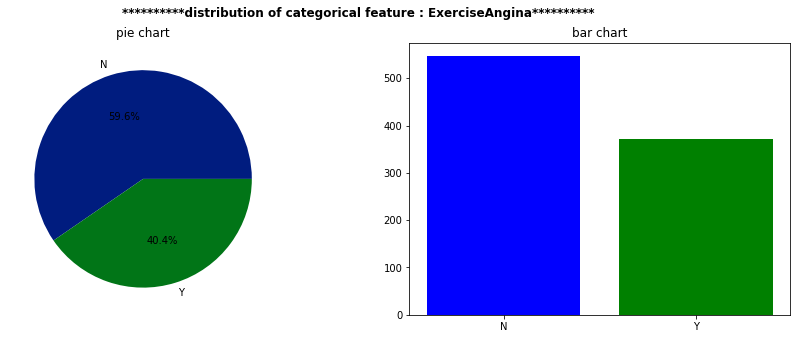

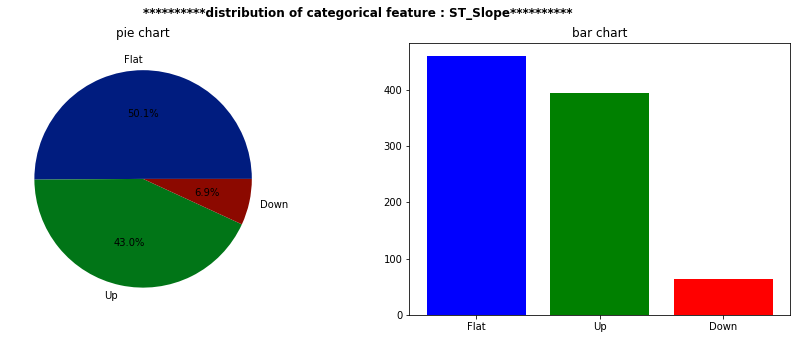

In [146]:
cat_features=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
list(map(cat_feature_plot,cat_features))

In [147]:
#Creating a plot for Numerical Features:
def plot_numerical_dist(f_name):
    plt.figure(figsize=(15,5))
    plt.suptitle('*'*10+'distribution of numerical feature : {}'.format(f_name)+'*'*10 , fontweight='heavy')
    plt.style.use('seaborn-dark-palette')
    plt.subplot(1,2,1)
    sns.histplot(data=df,x=f_name , kde=True )
    
    plt.subplot(1,2,2)
    sns.boxenplot(data=df , x=f_name,linewidth=1.5)

[None, None, None, None, None, None, None]

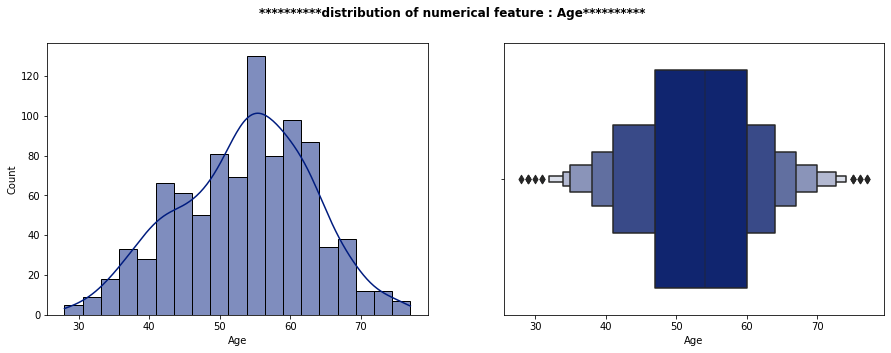

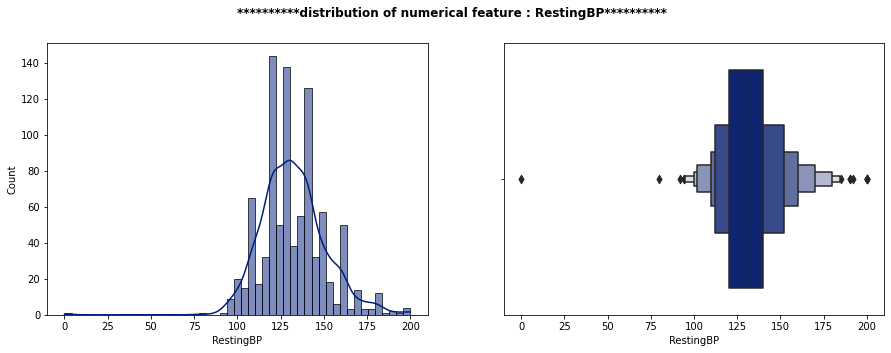

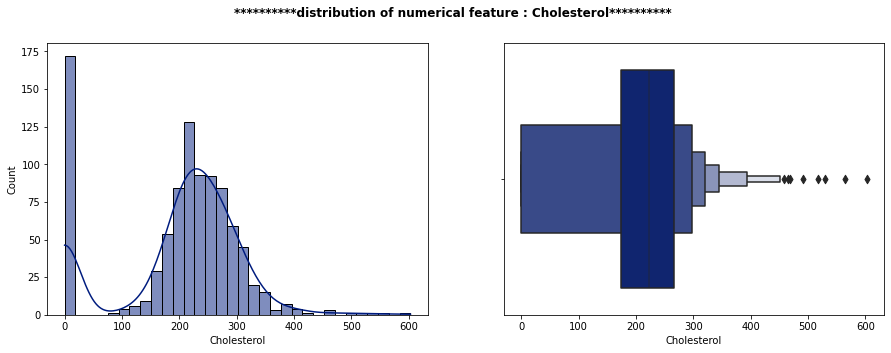

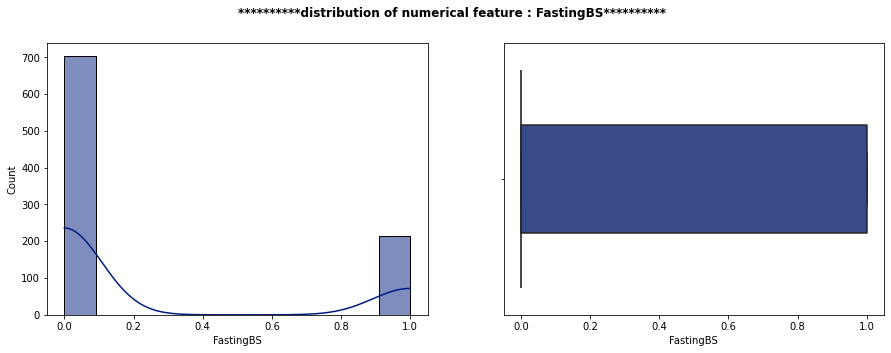

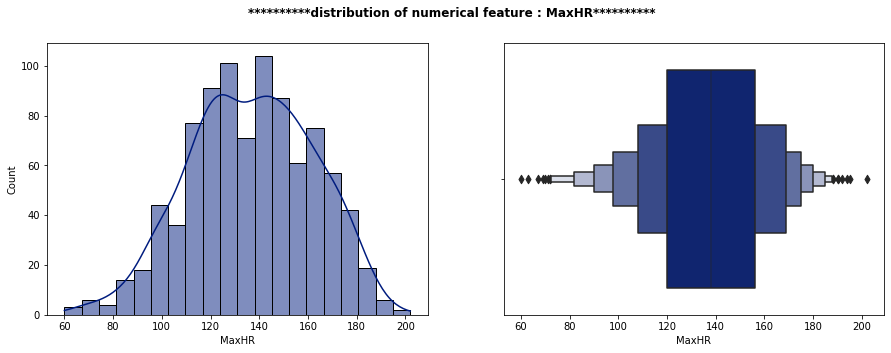

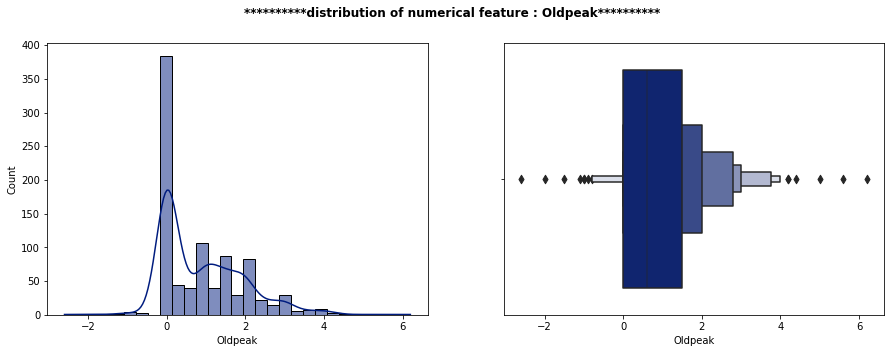

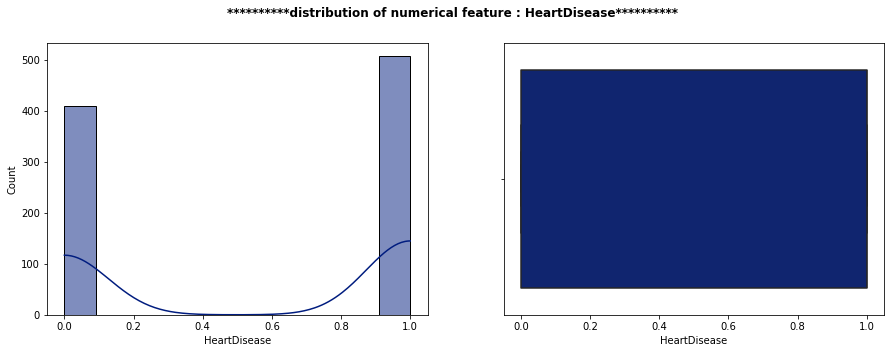

In [148]:
numerical_features=['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']
list(map(plot_numerical_dist,numerical_features))

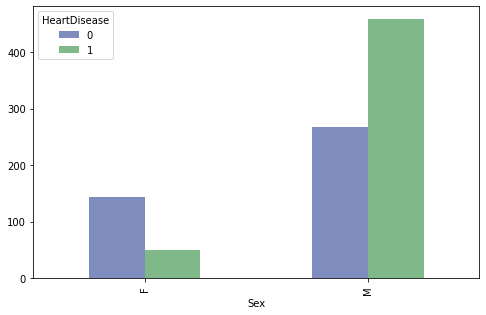

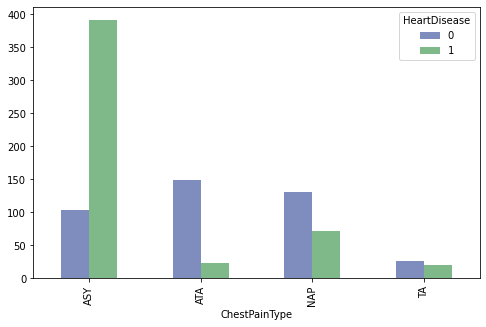

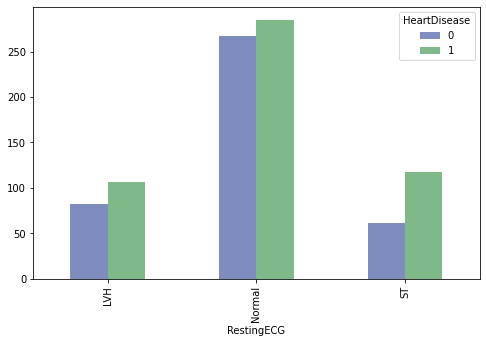

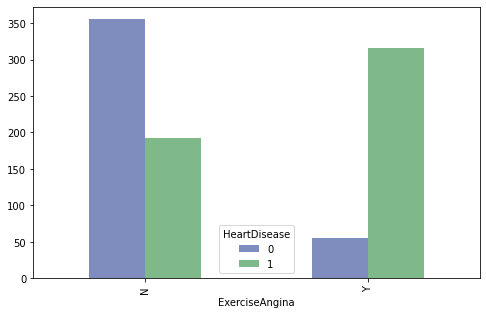

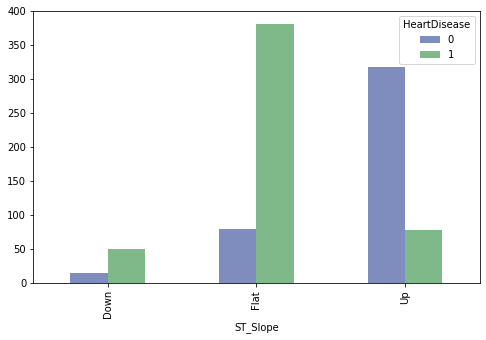

In [149]:
#Relation of categorical variable with HeartDiesese
for col in Categorical_features :
    
    pd.crosstab(df[col], df.HeartDisease).plot(kind='bar', figsize=(8, 5), alpha=0.50)

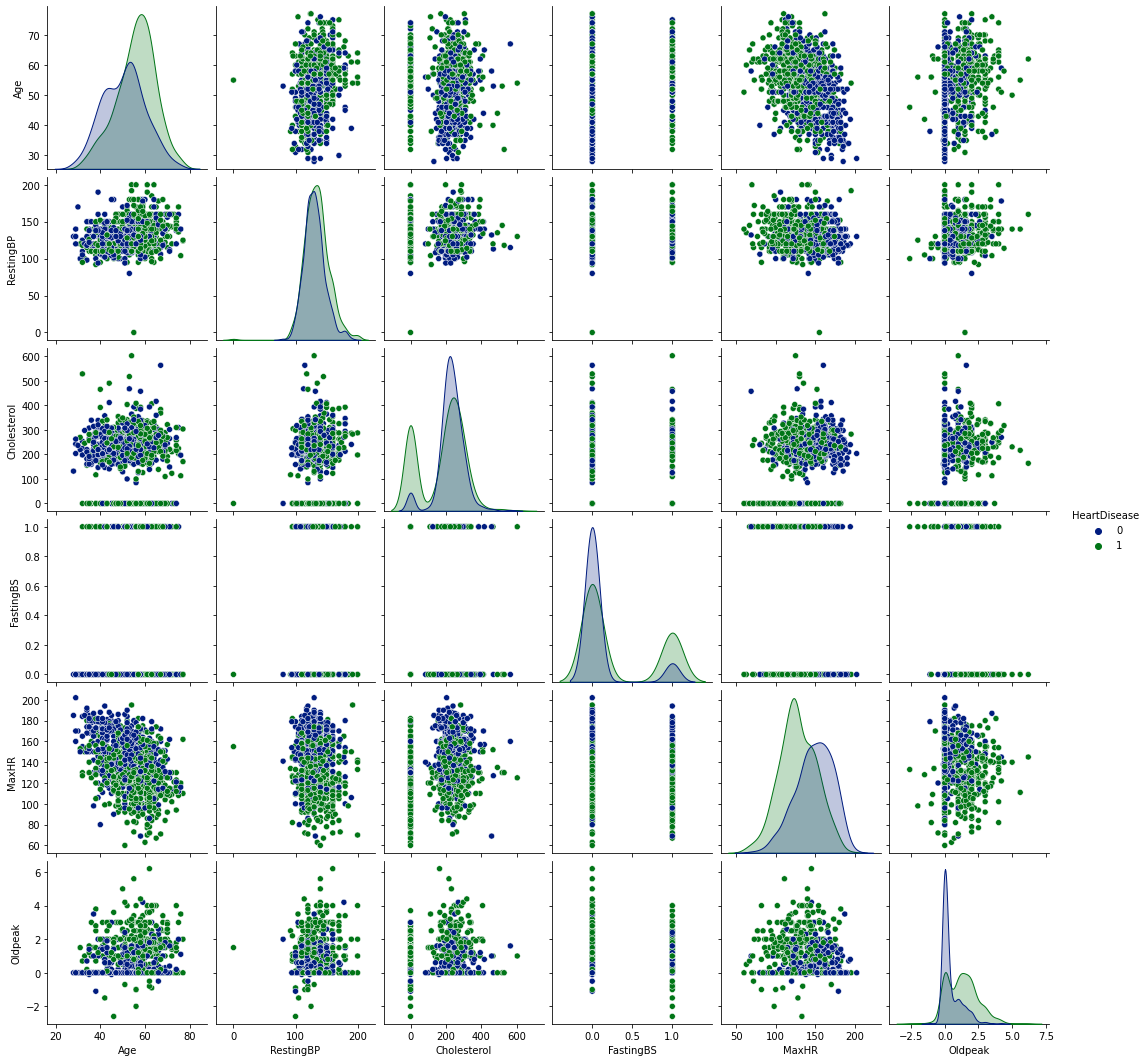

In [150]:
#Distribution of Numerical Features:
sns.pairplot(data1, hue = 'HeartDisease', vars =['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak'])


<AxesSubplot:>

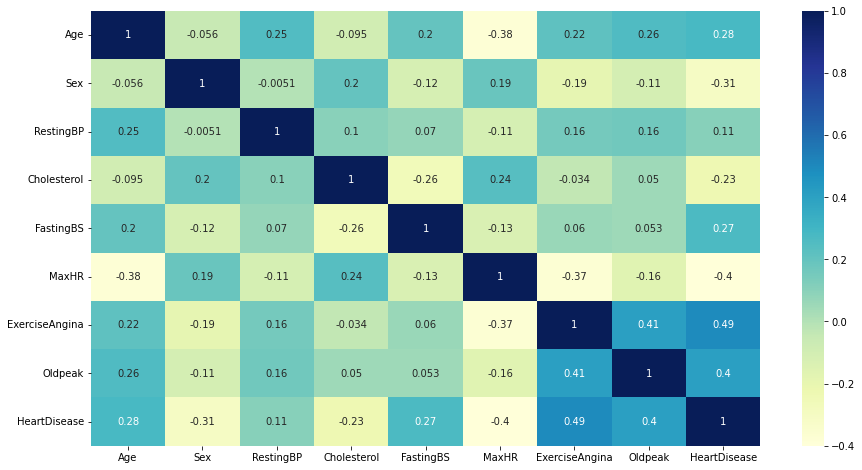

In [151]:
#Co relation :
plt.figure(figsize = (15,8))
sns.heatmap(data1.corr(),annot=True,cmap='YlGnBu')

<AxesSubplot:xlabel='Age', ylabel='count'>

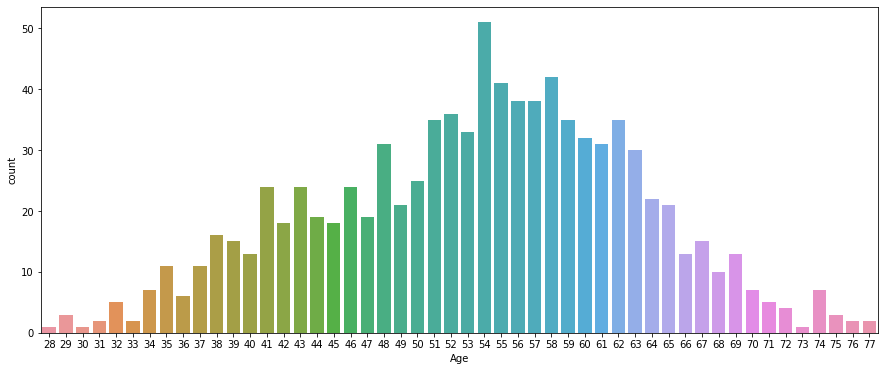

In [152]:
plt.figure(figsize=(15,6))
sns.countplot(x=data1['Age'])

<AxesSubplot:>

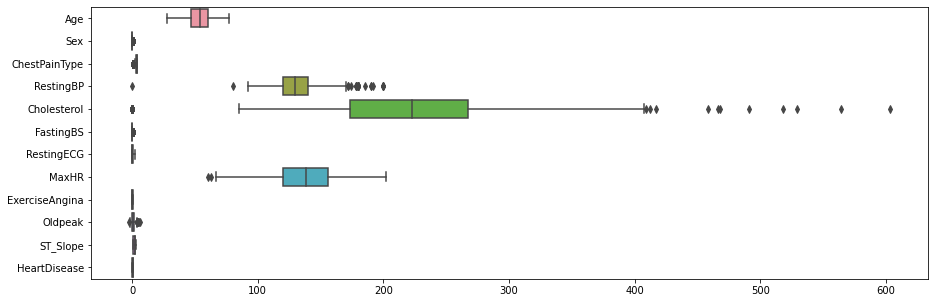

In [153]:
#Removing Outliers
plt.figure(figsize=(15,5))
sns.boxplot(data=data1,orient='h')

In [154]:
data1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,3,160,180,0,0,156,0,1.0,2,1
2,37,0,2,130,283,0,1,98,0,0.0,1,0
3,48,1,4,138,214,0,0,108,1,1.5,2,1
4,54,0,3,150,195,0,0,122,0,0.0,1,0


In [155]:
def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    x=(dataframe < (quartile1 - 1.5 * iqr)) |(dataframe > (quartile3 + 1.5 * iqr))
    return x

In [156]:
print(determine_outlier_thresholds_iqr(data1,data1.columns))
#Obervation:
#The below code will give an output with some true and false values. 
#The data point where we have False that means these values are valid whereas True indicates presence of an outlier

       Age  ChestPainType  Cholesterol  ExerciseAngina  FastingBS  \
0    False          False        False           False      False   
1    False          False        False           False      False   
2    False          False        False           False      False   
3    False          False        False           False      False   
4    False          False        False           False      False   
..     ...            ...          ...             ...        ...   
913  False          False        False           False      False   
914  False          False        False           False       True   
915  False          False        False           False      False   
916  False          False        False           False      False   
917  False          False        False           False      False   

     HeartDisease  MaxHR  Oldpeak  RestingBP  RestingECG  ST_Slope    Sex  
0           False  False    False      False       False     False  False  
1           False  

<AxesSubplot:xlabel='RestingBP'>

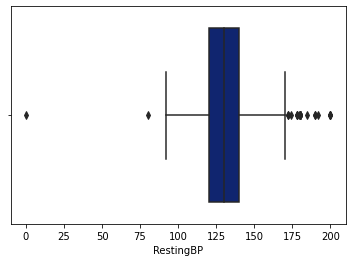

In [157]:
sns.boxplot(data1['RestingBP'])

<AxesSubplot:xlabel='Cholesterol'>

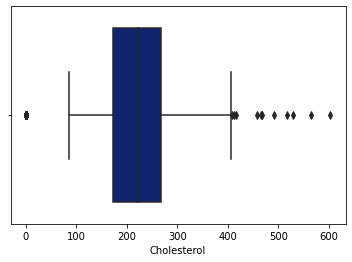

In [158]:
sns.boxplot(data1['Cholesterol'])

<AxesSubplot:xlabel='MaxHR'>

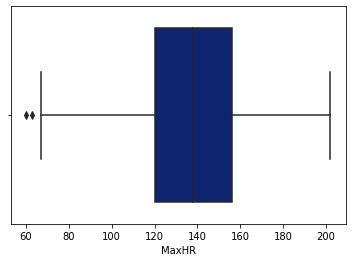

In [159]:

sns.boxplot(data1['MaxHR'])

In [160]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(data1['RestingBP'])
sample_outliers2=list(set(sample_outliers))
print("Outliers from IQR method: ", sample_outliers2)

Outliers from IQR method:  [0, 192, 200, 172, 174, 80, 178, 180, 185, 190]


In [161]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(data1['Cholesterol'])
sample_outliers2=list(set(sample_outliers))
print("Outliers from IQR method: ", sample_outliers2)

Outliers from IQR method:  [0, 417, 518, 458, 491, 529, 466, 468, 564, 409, 603, 412]


In [162]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(data1['MaxHR'])
sample_outliers2=list(set(sample_outliers))
print("Outliers from IQR method: ", sample_outliers2)

Outliers from IQR method:  [60, 63]


In [181]:
cols = ['RestingBP','MaxHR'] # one or more

Q1 = data1[cols].quantile(0.25)
Q3 = data1[cols].quantile(0.75)
IQR = Q3 - Q1

df23 = data1[~((data1[cols] < (Q1 - 1.5 * IQR)) |(data1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df23

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,3,160,180,0,0,156,0,1.0,2,1
2,37,0,2,130,283,0,1,98,0,0.0,1,0
3,48,1,4,138,214,0,0,108,1,1.5,2,1
4,54,0,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,1,110,264,0,0,132,0,1.2,2,1
914,68,0,4,144,193,1,0,141,0,3.4,2,1
915,57,0,4,130,131,0,0,115,1,1.2,2,1
916,57,1,2,130,236,0,2,174,0,0.0,2,1


<AxesSubplot:>

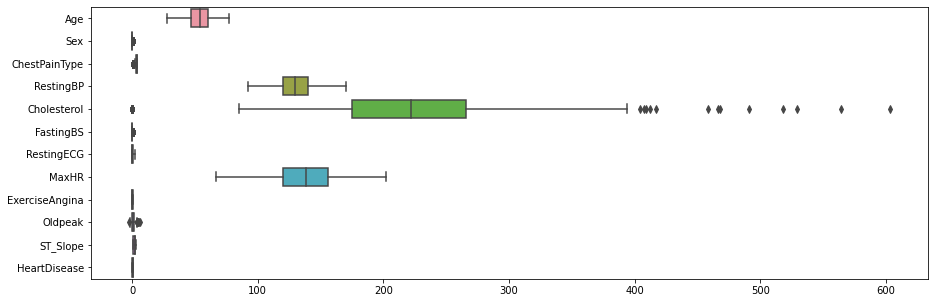

In [182]:
#Removing Outliers
plt.figure(figsize=(15,5))
sns.boxplot(data=df23,orient='h')

In [183]:
cols = ['Cholesterol'] # one or more

Q1 = df23[cols].quantile(0.25)
Q3 = df23[cols].quantile(0.75)
IQR = Q3 - Q1

df2 = df23[~((df23[cols] <= (Q1 - 1.5 * IQR)) |(df23[cols] >= (Q3 + 1.5 * IQR))).any(axis=1)]
df2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,3,160,180,0,0,156,0,1.0,2,1
2,37,0,2,130,283,0,1,98,0,0.0,1,0
3,48,1,4,138,214,0,0,108,1,1.5,2,1
4,54,0,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,1,110,264,0,0,132,0,1.2,2,1
914,68,0,4,144,193,1,0,141,0,3.4,2,1
915,57,0,4,130,131,0,0,115,1,1.2,2,1
916,57,1,2,130,236,0,2,174,0,0.0,2,1


<AxesSubplot:>

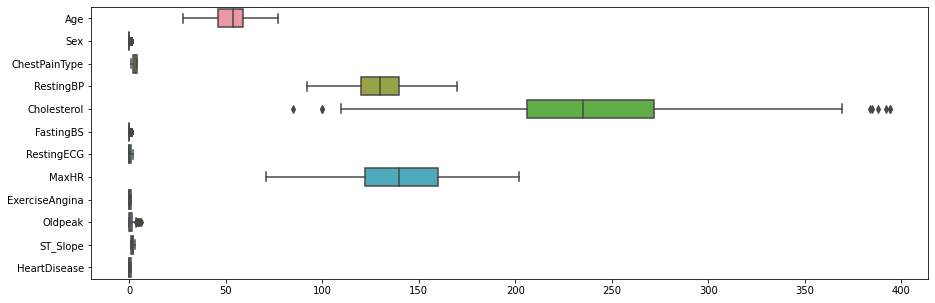

In [184]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df2,orient='h')

<AxesSubplot:xlabel='Cholesterol'>

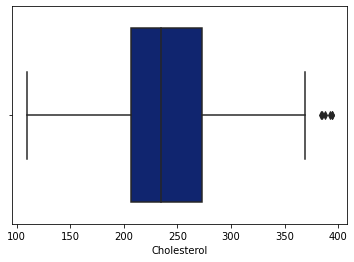

In [185]:
q1 = df2.Cholesterol.quantile(0.25)
q3 = df2.Cholesterol.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
k1=df2[df2["Cholesterol"] < lower_limit]
data2=df2[df2["Cholesterol"] > lower_limit]
sns.boxplot(data2["Cholesterol"])

<AxesSubplot:xlabel='Cholesterol'>

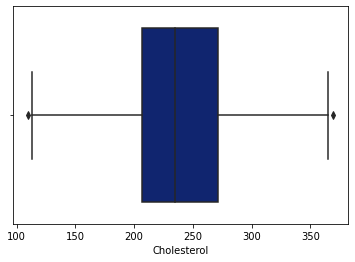

In [188]:
q1 = df2.Cholesterol.quantile(0.25)
q3 = df2.Cholesterol.quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + 1.5 * IQR
k1=data2[data2["Cholesterol"] > upper_limit]
data3=data2[data2["Cholesterol"] <= upper_limit]
sns.boxplot(data3["Cholesterol"])

<AxesSubplot:>

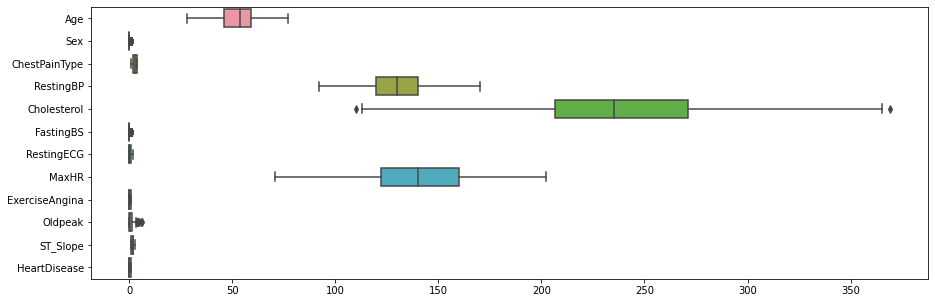

In [189]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data3,orient='h')

In [176]:
#Shape of Data
data3.shape

(702, 12)

In [190]:
data3.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,3,160,180,0,0,156,0,1.0,2,1
2,37,0,2,130,283,0,1,98,0,0.0,1,0
3,48,1,4,138,214,0,0,108,1,1.5,2,1
4,54,0,3,150,195,0,0,122,0,0.0,1,0


In [193]:
#spliting the Dataset and Standardization
independent1= data3.drop('HeartDisease',axis='columns')
independent1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,2,140,289,0,0,172,0,0.0,1
1,49,1,3,160,180,0,0,156,0,1.0,2
2,37,0,2,130,283,0,1,98,0,0.0,1
3,48,1,4,138,214,0,0,108,1,1.5,2
4,54,0,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,1,110,264,0,0,132,0,1.2,2
914,68,0,4,144,193,1,0,141,0,3.4,2
915,57,0,4,130,131,0,0,115,1,1.2,2
916,57,1,2,130,236,0,2,174,0,0.0,2


In [194]:
dependent1= data3["HeartDisease"]
dependent1

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 704, dtype: int64

In [196]:
#observation:
#trainseise=80%
#testsize=20%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent1,dependent1,test_size=0.2)

In [198]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-1.21329829, -0.54793334, -1.15205005, ..., -0.75382035,
        -0.81334455, -0.96375496],
       [-0.27798984,  1.82503951, -1.15205005, ..., -0.75382035,
        -0.81334455, -0.96375496],
       [ 1.28085757, -0.54793334,  0.90049482, ..., -0.75382035,
        -0.24929653, -0.96375496],
       ...,
       [-0.381913  , -0.54793334, -0.12577762, ...,  1.32657601,
         0.59677549,  0.70064395],
       [ 0.34554912,  1.82503951, -1.15205005, ..., -0.75382035,
         0.12673548,  0.70064395],
       [-0.17406668, -0.54793334, -0.12577762, ..., -0.75382035,
         1.06681551,  0.70064395]])

In [199]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.86516493,  1.82503951, -1.15205005, ...,  1.32657601,
        -0.81334455, -0.96375496],
       [ 0.1377028 , -0.54793334, -1.15205005, ..., -0.75382035,
        -0.81334455, -0.96375496],
       [ 1.28085757,  1.82503951, -0.12577762, ..., -0.75382035,
        -0.06128053, -0.96375496],
       ...,
       [ 1.59262705, -0.54793334, -0.12577762, ..., -0.75382035,
        -0.81334455,  0.70064395],
       [ 0.55339545, -0.54793334, -1.15205005, ..., -0.75382035,
        -0.43731254,  0.70064395],
       [ 0.1377028 , -0.54793334,  0.90049482, ...,  1.32657601,
         2.00689554,  0.70064395]])

In [200]:
#Applying Descision Tree Model :
from sklearn import tree
DTC = tree.DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [202]:
DTC_pred = DTC.predict(X_test)
pd.DataFrame(np.c_[y_test,DTC_pred],columns=['Actual','Predicted']).head(10)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,0,1
7,0,0
8,1,1
9,0,0


In [205]:
#printing the Accuracy and Confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(" Test Accuracy score : ",DTC.score(X_test,y_test))
print("Train Accuracy score : ",DTC.score(X_train,y_train))
print("----------------------")
print("Classification Report")
print("----------------------")
CM = confusion_matrix(DTC_pred,y_test)
CM

 Test Accuracy score :  0.8226950354609929
Train Accuracy score :  1.0
----------------------
Classification Report
----------------------


array([[60, 11],
       [14, 56]], dtype=int64)